In [17]:
import matplotlib.pyplot as plt
import numpy as np
import wkw

In [33]:
path_wkw = '/home/drawitschf/Code/gen-EM/.data/8-8-8'
dataset = wkw.Dataset.open(path_wkw)
data = dataset.read([500, 500, 0], [700, 700, 11])

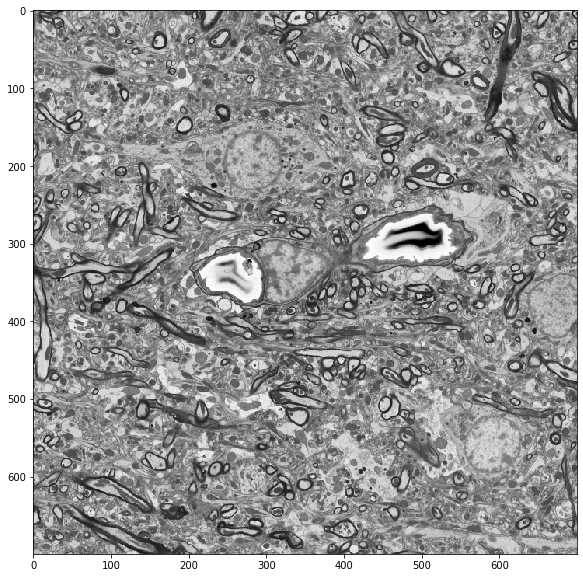

In [34]:
plt.figure(figsize=(12,10))
plt.imshow(data.squeeze(0)[:,:,0], cmap='gray')